#  <h1><center>Grocery Sales Forecesting for Supermarket</center></h1>

<img src="header.png">

Img Source: Kaggle.com

## Table of Contents

1. Abstract

2. Introduction

3. Import libraries

4. Data Sources

   4.a. Data Loading
   
   4.b. Anamoly Detection
   
   4.c. Data Preparation and Data Cleaning
   
5. Analyzing Impact of Oil on the Sales

6. Data Blending

7. Product Purchase Trend

   7.a Fetching N most purchased products

8. Exploratory Data Analysis

9. Data Transformation

   9.a. One Hot Encoding
   
10. Regression Techniques

   10.a Linear Regression
   
   10.b Decision Tree Regressors
   
   10.c Extra Tree Regressors
   
   10.d Random Forest Regressors
   
   10.e Gradient Boosting Regressors
   
   10.f XGBoost
   
11. Light Gradient Boosting Method (LGBM)

12. Creating Neural Network

13. Conclusion

14. References and Attributions



# 1. Abstract

<img src="Forecast.jpg">

Product sales forecasting is a major aspect of purchasing management. Forecasts are crucial in
determining inventory stock levels, and accurately estimating future demand for goods has been an
ongoing challenge, especially in the Supermarkets and Grocery Stores industry. If goods are not readily
available or goods availability is more than demand overall profit can be compromised. As a result, sales
forecasting for goods can be significant to ensure loss is minimized. Additionally, the problem becomes
more complex as retailers add new locations with unique needs, new products, ever transitioning
seasonal tastes, and unpredictable product marketing. In this analysis, a forecasting model is developed
using machine learning algorithms to improve the accurately forecasts product sales. The proposed
model is especially targeted to support the future purchase and more accurate forecasts product sales
and is not intended to change current subjective forecasting methods. A model based on a real grocery
store's data is developed in order to validate the use of the various machine learning algorithms. In the
case study, multiple regression methods are compared. The methods impact on forecast product
availability in store to ensure they have just enough products at right time.

### The aim of this project is to forecast more accurate product sales for the Ecuadorian supermarket chain based on certain features.


# 2. Introduction

In this project, we are trying to forecasts product sales based on the items, stores, transaction and other
dependent variables like holidays and oil prices.

This is a Kaggle Competition called "Corporación Favorita Grocery Sales Forecasting" where the task is to
predict stocking of products to better ensure grocery stores please customers by having just enough of
the right products at the right time.

For this particular problem, we have analyzed the data as a supervised learning problem. In order to
forecasts the sales we have compared different regression models like Linear Regression, Decision Tree,
ExtraTreeRegressor, Gradient Boosting, Random Forest and XgBoost. Further to optimize the results we
have used multilayer perception (MLP: a class of feed forward artificial neural network) and LightGBM (
gradient boosting framework that uses tree based learning algorithms).

The data comes in the shape of multiple files. First, the training data (train.csv) essentially contains the sales by date, store, and item. The test data (test.csv) contains the same features without the sales information, which we are tasked to predict. The train vs test split is based on the date. In addition, some test items are not included in the train data.

<img src="background.jpg">

# 3. Import libraries:

The libraries that we will be using are:

**Numpy** : NumPy is a library for the Python programming language, adding support for large, multi-dimensional   arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


**Pandas** :  Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.


**Matplotlib** : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.


**Scikit-learn** : Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.


**XgBoost** : XgBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.


**Keras** : Keras is a deep learning library that: Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility). Supports both convolutional networks and recurrent networks, as well as combinations of the two.


**LightGBM** : LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient



We shall be loading all the above libraries and several of their features which we will be using.

In [2]:
#Loading all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,minmax_scale,PolynomialFeatures,StandardScaler,Normalizer
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import train_test_split
%matplotlib inline
import datetime
from datetime import date, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import keras
import sys
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import lightgbm as lgb

Using TensorFlow backend.


# 4. Data Sources

The main dataset consist of sales data on the basis of dates, store and item information, whether that item was being promoted, as well as the unit sales. The data span a peroid of 5 years from 2013 to 2017.

You can find dataset at: https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data

There are 5 additional data files that include supplementary information that may be useful in building model:

**stores.csv** : Consist of Store metadata, including city, state, type, and cluster (cluster is a grouping of similar stores).

**items.csv** : Item metadata, such as class and whether they are perishable. Note, that perishable items have a higher scoring weight than others.

**transactions.csv** : Count of sales transactions for each date, store_nbr combination

**oil.csv** : Daily oil price. This is relevant, because “Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.” (source)

**holidays_events.csv** : Holidays in Ecuador. Some holidays can be transferred to another day (possibly from weekend to weekday).


<img src="Capture1.jpg">


The text in the document by Source Kaggle is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/


# 4.a. Data Loading

In [3]:
#Loading the data
dtypes = {'store_nbr': np.dtype('int64'),
          'item_nbr': np.dtype('int64'),
          'unit_sales': np.dtype('float64'),
          'onpromotion': np.dtype('O')}

Sales = pd.read_csv('favoritaTrain_Set2.csv', dtype=dtypes)
test = pd.read_csv('test.csv', dtype=dtypes)
stores = pd.read_csv('stores.csv')
items = pd.read_csv('items.csv')
trans = pd.read_csv('transactions.csv')
#oil = pd.read_csv('../input/oil.csv') #we upload this database later
holidays = pd.read_csv('holidays_events.csv')

In [4]:
#sampling the data, since the data is too huge to carry put any operations
date_mask = (Sales['date'] >= '2017-07-15') & (Sales['date'] <= '2017-08-15')

Salesdf = Sales[date_mask]

#Print the size
len(Salesdf)

336867

# 4.b. Anamoly Detection

In [5]:
#Load the data
oil = pd.read_csv('oil.csv')

#add missing date
min_oil_date = min(Salesdf.date)
max_oil_date = max(Salesdf.date)

calendar = []

d1 = datetime.datetime.strptime(min_oil_date, '%Y-%m-%d')  # start date
d2 = datetime.datetime.strptime(max_oil_date, '%Y-%m-%d')  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    calendar.append(datetime.date.strftime(d1 + timedelta(days=i), '%Y-%m-%d'))

calendar = pd.DataFrame({'date':calendar})

oil = calendar.merge(oil, left_on='date', right_on='date', how='left')

In [6]:
oil.head()

date  dcoilwtico
0  2017-07-15         NaN
1  2017-07-16         NaN
2  2017-07-17       46.02
3  2017-07-18       46.40
4  2017-07-19       47.10

# 4.c Data Preparation and Data Cleaning

In [7]:
#Check how many NA
print(oil.isnull().sum(), '\n')

#Type
print('Type : ', '\n', oil.dtypes)

#Print the 5 first line
oil.head(5)

date           0
dcoilwtico    10
dtype: int64 

Type :  
 date           object
dcoilwtico    float64
dtype: object


date  dcoilwtico
0  2017-07-15         NaN
1  2017-07-16         NaN
2  2017-07-17       46.02
3  2017-07-18       46.40
4  2017-07-19       47.10

# 5. Analyzing Impact of Oil on the sales of other products
Oli is one pof the important factor in economy so we are replacing null values with the average of previous and next day value 

In [8]:
#Check index to apply the formula
na_index_oil = oil[oil['dcoilwtico'].isnull() == True].index.values

#Define the index to use to apply the formala
na_index_oil_plus = na_index_oil.copy()
na_index_oil_minus = np.maximum(0, na_index_oil-1)

for i in range(len(na_index_oil)):
    k = 1
    while (na_index_oil[min(i+k,len(na_index_oil)-1)] == na_index_oil[i]+k):
        k += 1
    na_index_oil_plus[i] = min(len(oil)-1, na_index_oil_plus[i] + k )

#Apply the formula
for i in range(len(na_index_oil)):
    if (na_index_oil[i] == 0):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_plus[i], 'dcoilwtico']
    elif (na_index_oil[i] == len(oil)):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_minus[i], 'dcoilwtico']
    else:
        oil.loc[na_index_oil[i], 'dcoilwtico'] = (oil.loc[na_index_oil_plus[i], 'dcoilwtico'] + oil.loc[na_index_oil_minus[i], 'dcoilwtico'])/ 2   

In [9]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

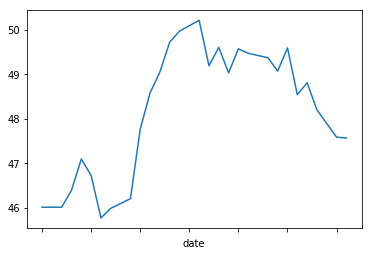

In [10]:
#Plot the oil values
oil_plot = oil['dcoilwtico'].copy()
oil_plot.index = oil['date'].copy()
oil_plot.plot()
plt.show()

##### By the end of the analysis it is evident that the sale of oil as an important commodity has a significant impact on the unit sales of other products.

The text in the document by Source Wikipedia is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The text in the document by Analytics Vidhya is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document by Source Kaggle is licensed under the MIT License https://opensource.org/licenses/MIT

# 6. Data Blending

Data blending is the process of combining data from multiple sources into a functioning dataset. This process is gaining attention among analysts and analytic companies due to the fact that it is a quick and straightforward method used to extract value from multiple data sources. It can help to discover correlations between the different data sets without the time and expense of traditional data warehouse processes.

In [11]:
#Merge train
Salesdf = Salesdf.drop('id', axis = 1)
Salesdf = Salesdf.merge(stores, left_on='store_nbr', right_on='store_nbr', how='left')
Salesdf = Salesdf.merge(items, left_on='item_nbr', right_on='item_nbr', how='left')
Salesdf = Salesdf.merge(holidays, left_on='date', right_on='date', how='left')
Salesdf = Salesdf.merge(oil, left_on='date', right_on='date', how='left')
Salesdf = Salesdf.drop(['description', 'state', 'locale_name', 'class'], axis = 1)

In [12]:
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336867 entries, 0 to 336866
Data columns (total 14 columns):
date           336867 non-null object
store_nbr      336867 non-null int64
item_nbr       336867 non-null int64
unit_sales     336867 non-null float64
onpromotion    336867 non-null object
city           336867 non-null object
type_x         336867 non-null object
cluster        336867 non-null int64
family         336867 non-null object
perishable     336867 non-null int64
type_y         73283 non-null object
locale         73283 non-null object
transferred    73283 non-null object
dcoilwtico     336867 non-null float64
dtypes: float64(2), int64(4), object(8)
memory usage: 38.6+ MB


In [13]:
Salesdf.isnull().sum().sort_values(ascending=False)

transferred    263584
locale         263584
type_y         263584
dcoilwtico          0
perishable          0
family              0
cluster             0
type_x              0
city                0
onpromotion         0
unit_sales          0
item_nbr            0
store_nbr           0
date                0
dtype: int64

In [14]:
#Shape
print('Shape : ', Salesdf.shape, '\n')

#Type
print('Type : ', '\n', Salesdf.dtypes)

#Summary
Salesdf.describe()

Shape :  (336867, 14) 

Type :  
 date            object
store_nbr        int64
item_nbr         int64
unit_sales     float64
onpromotion     object
city            object
type_x          object
cluster          int64
family          object
perishable       int64
type_y          object
locale          object
transferred     object
dcoilwtico     float64
dtype: object


store_nbr      item_nbr     unit_sales        cluster  \
count  336867.000000  3.368670e+05  336867.000000  336867.000000   
mean       28.313305  1.170498e+06       8.043790       8.709102   
std        16.309769  5.868558e+05      22.929827       4.563188   
min         1.000000  9.699500e+04     -36.000000       1.000000   
25%        13.000000  6.925310e+05       2.000000       5.000000   
50%        29.000000  1.209720e+06       4.000000       9.000000   
75%        44.000000  1.576330e+06       8.000000      13.000000   
max        54.000000  2.127114e+06    3952.000000      17.000000   

          perishable     dcoilwtico  
count  336867.000000  336867.000000  
mean        0.258402      48.146043  
std         0.437757       1.467865  
min         0.000000      45.780000  
25%         0.000000      46.400000  
50%         0.000000      48.580000  
75%         1.000000      49.470000  
max         1.000000      50.210000

In [15]:
#5 random lines
Salesdf.sample(10)

date  store_nbr  item_nbr  unit_sales onpromotion       city  \
220265  2017-07-29         13   1239908         6.0       False  Latacunga   
230155  2017-07-30         41    890825         1.0       False    Machala   
99418   2017-07-29         23   1909483         2.0       False     Ambato   
19077   2017-08-02         20   1463783         2.0       False      Quito   
114306  2017-07-31         13   1373037         2.0       False  Latacunga   
287861  2017-08-12         53    936994         6.0       False      Manta   
275581  2017-07-20          9   2047752         6.0       False      Quito   
100110  2017-08-14         40    788172         3.0       False    Machala   
34409   2017-07-26         42   1012788         2.0       False     Cuenca   
207282  2017-08-09         34    255161         1.0        True  Guayaquil   

       type_x  cluster               family  perishable type_y locale  \
220265      C       15                DAIRY           1    NaN    NaN   
230155      D        4            GROCERY I           0    NaN    NaN   
99418       D        9  HOME AND KITCHEN II           0    NaN    NaN   
19077       B        6            BEVERAGES           0    NaN    NaN   
114306      C       15  HOME AND KITCHEN II           0    NaN    NaN   
287861      D       13            GROCERY I           0    NaN    NaN   
275581      B        6             CLEANING           0    NaN    NaN   
100110      C        3             CLEANING           0    NaN    NaN   
34409       D        2            GROCERY I           0    NaN    NaN   
207282      B        6            GROCERY I           0    NaN    NaN   

       transferred  dcoilwtico  
220265         NaN     49.9650  
230155         NaN     50.0875  
99418          NaN     49.9650  
19077          NaN     49.6000  
114306         NaN     50.2100  
287861         NaN     48.2000  
275581         NaN     46.7300  
100110         NaN     47.5900  
34409          NaN     48.5800  
207282         NaN     49.5900

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


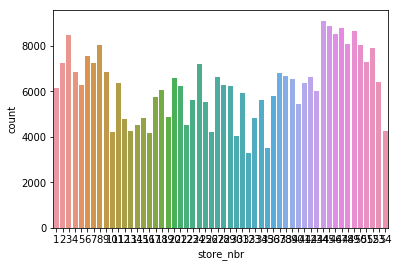

In [16]:
sns.countplot(x='store_nbr', data=Salesdf);

##### The the above plot shows the number of stores according to each store type.

In [17]:
Salesdf.item_nbr.unique

<bound method Series.unique of 0          633977
1         1991151
2          968935
3         1909453
4         1695875
5          884878
6          322095
7          915980
8          939131
9         2013621
10         838216
11        1146783
12        1473428
13         940590
14         938126
15        2027777
16         916886
17        1660194
18         404334
19         214381
20        1114761
21         414426
22        2035581
23         513855
24        2010766
25        1473511
26        1112840
27        1037857
28         769312
29         510054
           ...   
336837    1987383
336838     273528
336839     315320
336840    1473476
336841    1321497
336842     872317
336843    1456881
336844    1967038
336845     552050
336846    1695848
336847     839362
336848     979197
336849     360705
336850    1920284
336851    1464088
336852    1281011
336853     957096
336854    1914786
336855    1153584
336856     812751
336857    1986680
336858    2048358
336859    11503

In [18]:
x=itemfreq(Salesdf.item_nbr)
x=x[x[:,1].argsort()[::-1]]
x

array([[1254013,     203],
       [2042947,     195],
       [ 847863,     190],
       ..., 
       [1047709,       1],
       [2011032,       1],
       [1360013,       1]], dtype=int64)

In [19]:
x[:,0][0:10]

array([1254013, 2042947,  847863, 1473475, 1489899,  115894,  273528,
       1342003, 1157329, 1080021], dtype=int64)

In [20]:
s=Salesdf.item_nbr.as_matrix()
s

array([ 633977, 1991151,  968935, ..., 1456916, 1471462,  671079], dtype=int64)

In [21]:
t=s.reshape(s.shape[0],1)
t

array([[ 633977],
       [1991151],
       [ 968935],
       ..., 
       [1456916],
       [1471462],
       [ 671079]], dtype=int64)

In [22]:
t1=np.where(t==x)
t1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


(array([], dtype=int64),)

# 7. Product Purchase Trend

##  7.a. Fetching the N most purchased products

In [23]:
#Fetching the N most purchased products#
def N_most_labels(data, variable , N , all='TRUE'):
    labels_freq_pd = itemfreq(data[variable])
    labels_freq_pd = labels_freq_pd[labels_freq_pd[:, 1].argsort()[::-1]] #[::-1] ==> to sort in descending order
    
    if all == 'FALSE':
        main_labels = labels_freq_pd[:,0][0:N]
    else: 
        main_labels = labels_freq_pd[:,0][:]
        
    labels_raw_np = data[variable].as_matrix() #transform in numpy
    labels_raw_np = labels_raw_np.reshape(labels_raw_np.shape[0],1)

    labels_filtered_index = np.where(labels_raw_np == main_labels)
    
    return labels_freq_pd, labels_filtered_index

label_freq, labels_filtered_index = N_most_labels(data = Salesdf, variable = "item_nbr", N = 20, all='FALSE')
print("labels_filtered_index[0].shape = ", labels_filtered_index[0].shape)

Salesdf_filtered = Salesdf.loc[labels_filtered_index[0],:]


labels_filtered_index[0].shape =  (3735,)


The number of most purchased products gives us the idea of looking for the sales for those products.

The code in the document by Source Kaggle is licensed under the MIT License https://opensource.org/licenses/MIT

In [24]:
label_freq[0:10]

array([[1254013,     203],
       [2042947,     195],
       [ 847863,     190],
       [1473475,     189],
       [1489899,     189],
       [ 115894,     188],
       [ 273528,     187],
       [1342003,     186],
       [1157329,     186],
       [1080021,     186]], dtype=int64)

In [25]:
Salesdf_filtered.sample(3)

date  store_nbr  item_nbr  unit_sales onpromotion       city  \
20977  2017-07-19         13   1489899         1.0       False  Latacunga   
74654  2017-07-22         11    581078        22.0       False    Cayambe   
91572  2017-08-10         32   1254013         5.0       False  Guayaquil   

      type_x  cluster         family  perishable   type_y    locale  \
20977      C       15        PRODUCE           1      NaN       NaN   
74654      B        6       CLEANING           0      NaN       NaN   
91572      C        3  PERSONAL CARE           0  Holiday  National   

      transferred  dcoilwtico  
20977         NaN      47.100  
74654         NaN      45.995  
91572        True      48.540

In [26]:
#Fill in cells if there is no holiday by the value : "no_holyday"
na_index_Salesdf = Salesdf_filtered[Salesdf_filtered['type_y'].isnull() == True].index.values
print("Size of na_index_Salesdf : ", len(na_index_Salesdf), '\n')

Salesdf_filtered.loc[Salesdf_filtered['type_y'].isnull(), 'type_y'] = "no_holyday"
Salesdf_filtered.loc[Salesdf_filtered['locale'].isnull(), 'locale'] = "no_locale"
Salesdf_filtered.loc[Salesdf_filtered['transferred'].isnull(), 'transferred'] = "no_holyday"
    
#check is there is NA
Salesdf_filtered.isnull().sum()

Size of na_index_Salesdf :  2933 



date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
city           0
type_x         0
cluster        0
family         0
perishable     0
type_y         0
locale         0
transferred    0
dcoilwtico     0
dtype: int64

In [27]:
def get_month_year(df):
    df['month'] = df.date.apply(lambda x: x.split('-')[1])
    df['year'] = df.date.apply(lambda x: x.split('-')[0])
    
    return df

get_month_year(Salesdf_filtered);

In [28]:
Salesdf_filtered['date'] = pd.to_datetime(Salesdf_filtered['date'])
Salesdf_filtered['day'] = Salesdf_filtered['date'].dt.weekday_name
Salesdf_filtered = Salesdf_filtered.drop('date', axis=1)

In [29]:
Salesdf_filtered.sample(10)

store_nbr  item_nbr  unit_sales onpromotion           city type_x  \
215670         46   1146785      21.000       False          Quito      A   
110589         20   1087269      38.000        True          Quito      B   
180340         49   2042947     225.000       False          Quito      A   
286490         31   1473475      15.848       False       Babahoyo      B   
288516         16   1080021       1.000       False  Santo Domingo      C   
245710         28   1958181      15.000       False      Guayaquil      E   
212031         52   1146785       2.000       False          Manta      A   
58369          25    273528       4.000       False        Salinas      D   
249646         10   1342003      16.000       False          Quito      C   
23922          53   2042947     223.000        True          Manta      D   

        cluster         family  perishable      type_y     locale transferred  \
215670       14      GROCERY I           0  no_holyday  no_locale  no_holyday   
110589        6  PERSONAL CARE           0  no_holyday  no_locale  no_holyday   
180340       11      BEVERAGES           0  no_holyday  no_locale  no_holyday   
286490       10        PRODUCE           1  no_holyday  no_locale  no_holyday   
288516        3      GROCERY I           0  no_holyday  no_locale  no_holyday   
245710       10      BEVERAGES           0  no_holyday  no_locale  no_holyday   
212031       11      GROCERY I           0  no_holyday  no_locale  no_holyday   
58369         1  PERSONAL CARE           0  no_holyday  no_locale  no_holyday   
249646       15      GROCERY I           0  no_holyday  no_locale  no_holyday   
23922        13      BEVERAGES           0  no_holyday  no_locale  no_holyday   

        dcoilwtico month  year        day  
215670     48.2000    08  2017   Saturday  
110589     49.6000    08  2017  Wednesday  
180340     46.0200    07  2017     Monday  
286490     46.0200    07  2017   Saturday  
288516     47.1000    07  2017  Wednesday  
245710     49.9650    07  2017   Saturday  
212031     46.0200    07  2017   Saturday  
58369      49.5700    08  2017     Friday  
249646     50.0875    07  2017     Sunday  
23922      50.0875    07  2017     Sunday

In [30]:
strain = Salesdf.sample(frac=0.01,replace=True)

# 8. Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


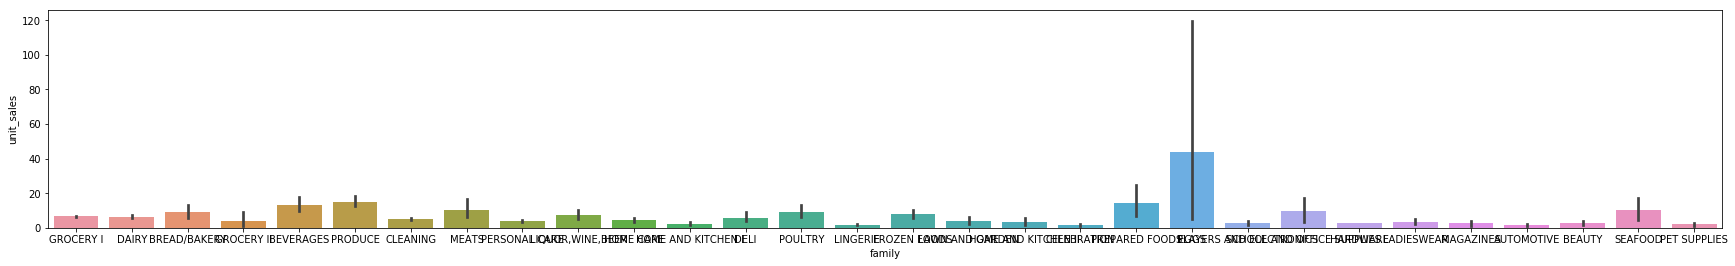

In [31]:
# Plotting Sales per Item Family
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.barplot(x='family', y='unit_sales', data=strain, ax=axis1)

##### The above plot shows the sales of products per Item family. The average unit_sales ranges somewhere between 0 to 20 with the maximum for the Food and Beverages item family.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


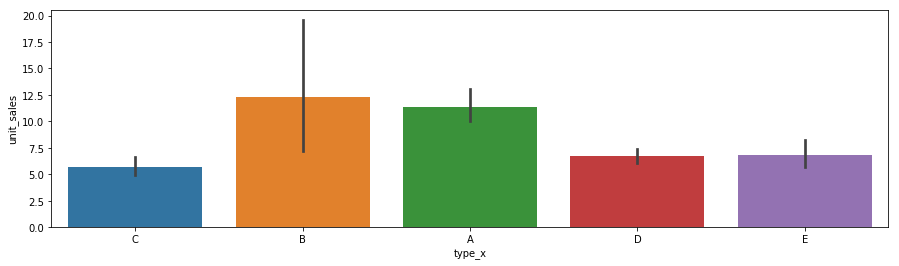

In [32]:
# Plotting Sales per Store Type
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.barplot(x='type_x', y='unit_sales', data=strain, ax=axis1)

##### The above bar plot of Total Sales per store type shows that Store type B has the maximum sales over other store types.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


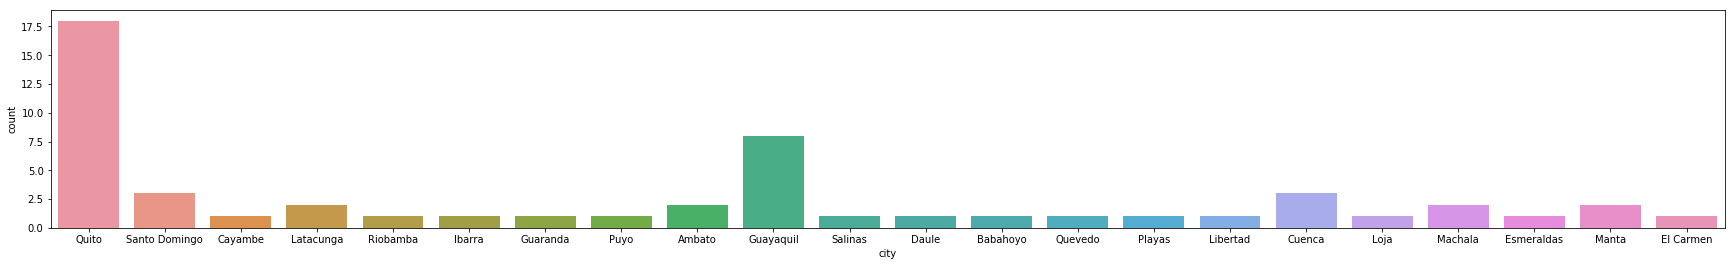

In [33]:
# Plotting Stores in Cities
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x=stores['city'], data=stores, ax=axis1)

##### The above plots shows City of Quito has the most number of Stores and the second being the city of Guayaquil.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


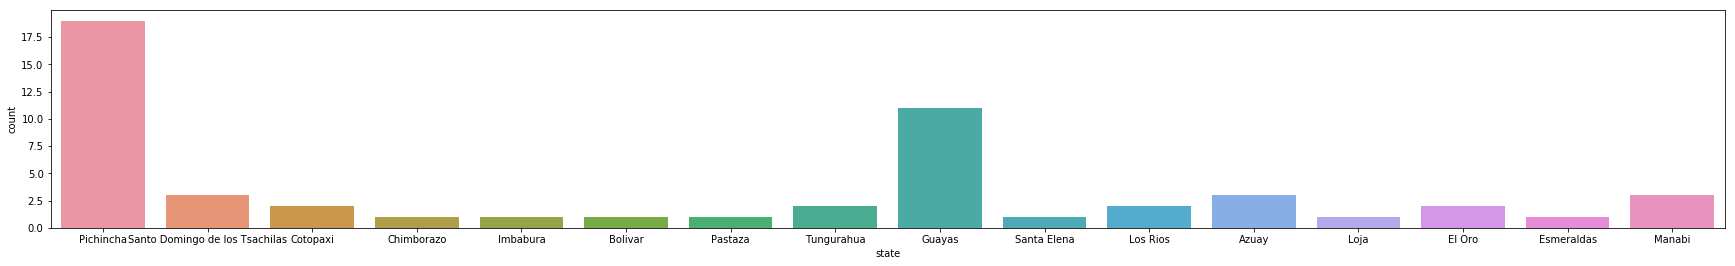

In [34]:
# Plotting Stores in States
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x=stores['state'], data=stores, ax=axis1)

##### The above plot shows States of Pichincha Santo and the state of Guayas has the most number of Stores.

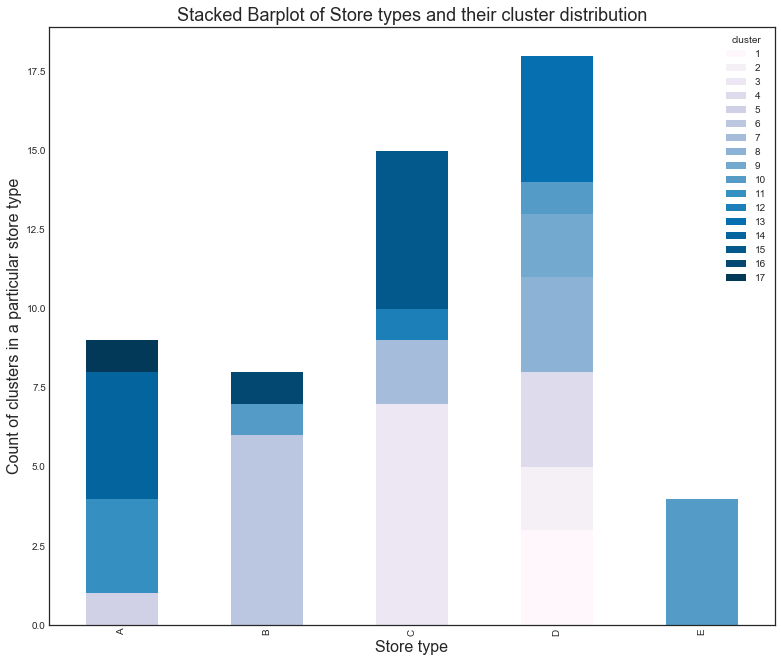

In [35]:
# Stacked Barplots of Types against clusters
plt.style.use('seaborn-white')
#plt.style.use('dark_background')
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)
plt.show()

##### The above bar plot shows the cluster distribution across the store types.

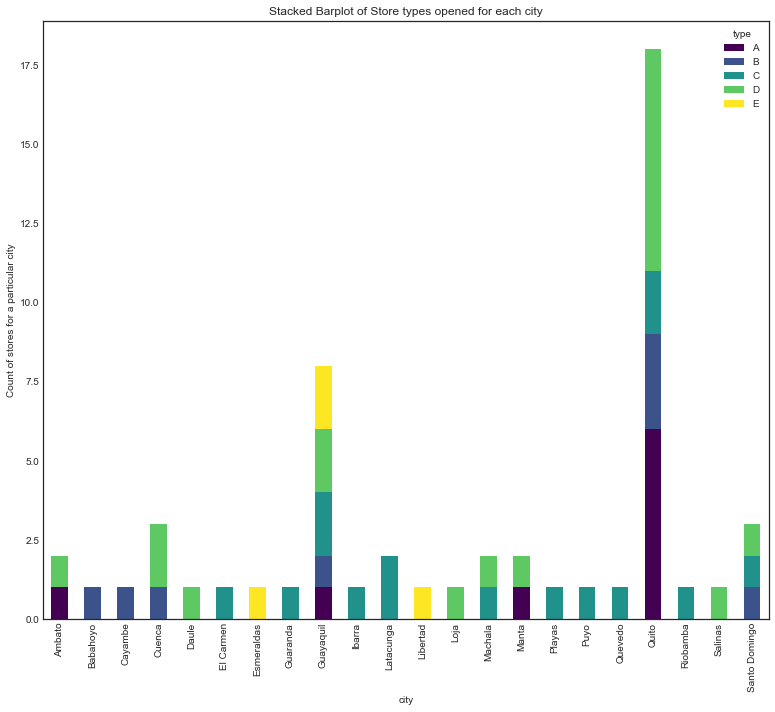

In [36]:
# Stacked barplot of types of stores across the different cities
plt.style.use('seaborn-white')
city_cluster = stores.groupby(['city','type']).store_nbr.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types opened for each city')
plt.ylabel('Count of stores for a particular city')
plt.show()

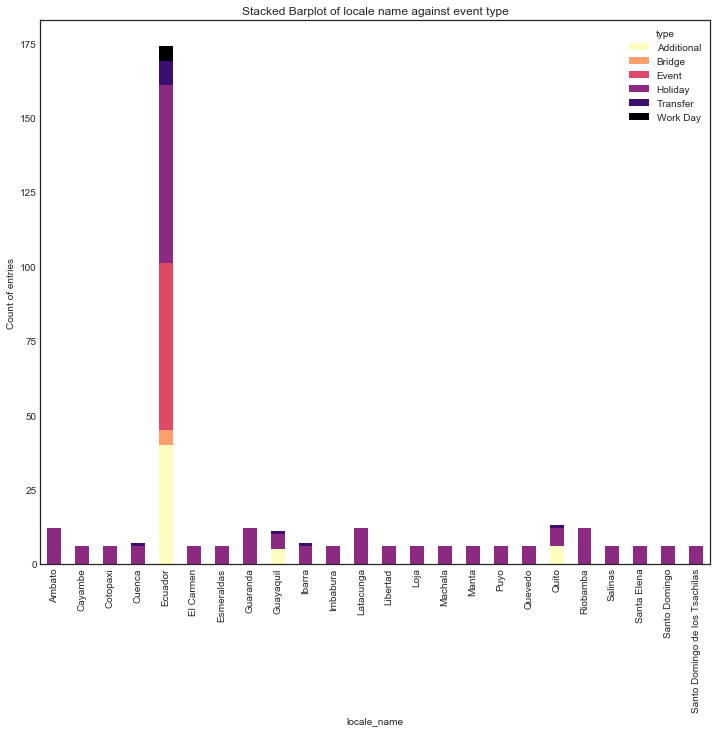

In [37]:
# Holiday Events data
plt.style.use('seaborn-white')
# plt.style.use('dark_background')
holiday_local_type = holidays.groupby(['locale_name', 'type']).size()
holiday_local_type.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.show()

# 9. Data Transformation Techniques

## 9.a One hot Encoding

### What is One Hot Encoding?
A one hot encoding is a representation of categorical variables as binary vectors.
This first requires that the categorical values be mapped to integer values.
Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

### Why Use a One Hot Encoding?
A one hot encoding allows the representation of categorical data to be more expressive.
Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.


### The text in the document by Source Wikipedia is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/


In [38]:
## One hot encoding using get_dummies on pandas dataframe.
dummy_variables = ['onpromotion','city','type_x','cluster','store_nbr','item_nbr',
                'family','perishable','type_y', 'locale', 'transferred', 'month', 'day']

for var in dummy_variables:
    dummy = pd.get_dummies(Salesdf_filtered[var], prefix = var, drop_first = False)
    Salesdf_filtered = pd.concat([Salesdf_filtered, dummy], axis = 1)

Salesdf_filtered = Salesdf_filtered.drop(dummy_variables, axis = 1)
Salesdf_filtered = Salesdf_filtered.drop(['year'], axis = 1)

In [39]:
Salesdf_filtered.info()
#Salesdf_filtered.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3735 entries, 135 to 336838
Columns: 149 entries, unit_sales to day_Wednesday
dtypes: float64(2), uint8(147)
memory usage: 623.7 KB


In [40]:
Salesdf_filtered.head()

unit_sales  dcoilwtico  onpromotion_False  onpromotion_True  city_Ambato  \
135        27.0     49.5900                  1                 0            0   
183        18.0     50.0875                  1                 0            0   
339        31.0     46.1025                  0                 1            0   
396         7.0     45.9950                  1                 0            0   
423        24.0     48.2000                  1                 0            0   

     city_Babahoyo  city_Cayambe  city_Cuenca  city_Daule  city_El Carmen  \
135              0             0            0           0               0   
183              0             0            0           0               0   
339              0             0            0           0               0   
396              0             0            1           0               0   
423              0             0            0           0               0   

         ...        transferred_no_holyday  month_07  month_08  day_Friday  \
135      ...                             1         0         1           0   
183      ...                             1         1         0           0   
339      ...                             0         1         0           0   
396      ...                             1         1         0           0   
423      ...                             1         0         1           0   

     day_Monday  day_Saturday  day_Sunday  day_Thursday  day_Tuesday  \
135           0             0           0             0            0   
183           0             0           1             0            0   
339           0             0           1             0            0   
396           0             1           0             0            0   
423           0             1           0             0            0   

     day_Wednesday  
135              1  
183              0  
339              0  
396              0  
423              0  

[5 rows x 149 columns]

##### The above dataframe contains data after the one hot encoding technique is applied to the data.

In [41]:
#Re-scale
#We keep this value to re-scale the predicted unit_sales values in the following lines of code.
min_train, max_train = Salesdf_filtered['unit_sales'].min(), Salesdf_filtered['unit_sales'].max()

In [42]:
scalable_variables = ['unit_sales','dcoilwtico']

for var in scalable_variables:
    mini, maxi = Salesdf_filtered[var].min(), Salesdf_filtered[var].max()
    Salesdf_filtered.loc[:,var] = (Salesdf_filtered[var] - mini) / (maxi - mini)

In [43]:
print('Shape : ', Salesdf_filtered.shape)
Salesdf_filtered.sample(10)

Shape :  (3735, 149)


unit_sales  dcoilwtico  onpromotion_False  onpromotion_True  \
169470    0.002335    0.860045                  1                 0   
245710    0.009127    0.944695                  1                 0   
34727     0.030603    0.408578                  1                 0   
212031    0.001101    0.054176                  1                 0   
187197    0.009127    0.404063                  1                 0   
213221    0.006816    0.546275                  1                 0   
230420    0.008509    0.054176                  1                 0   
38399     0.007892    0.944695                  0                 1   
277634    0.004746    0.072799                  1                 0   
73894     0.009127    0.408578                  1                 0   

        city_Ambato  city_Babahoyo  city_Cayambe  city_Cuenca  city_Daule  \
169470            0              0             0            0           0   
245710            0              0             0            0           0   
34727             0              0             0            0           0   
212031            0              0             0            0           0   
187197            0              0             0            0           0   
213221            0              0             0            0           0   
230420            1              0             0            0           0   
38399             0              0             0            0           0   
277634            0              0             0            0           0   
73894             0              0             0            0           0   

        city_El Carmen      ...        transferred_no_holyday  month_07  \
169470               0      ...                             1         0   
245710               0      ...                             1         1   
34727                0      ...                             1         0   
212031               0      ...                             1         1   
187197               0      ...                             0         0   
213221               0      ...                             1         0   
230420               0      ...                             1         1   
38399                0      ...                             1         1   
277634               0      ...                             0         1   
73894                0      ...                             1         0   

        month_08  day_Friday  day_Monday  day_Saturday  day_Sunday  \
169470         1           0           0             0           0   
245710         0           0           0             1           0   
34727          1           0           1             0           0   
212031         0           0           0             1           0   
187197         1           0           0             0           0   
213221         1           0           0             1           0   
230420         0           0           0             1           0   
38399          0           0           0             1           0   
277634         0           0           0             0           1   
73894          1           0           1             0           0   

        day_Thursday  day_Tuesday  day_Wednesday  
169470             0            0              1  
245710             0            0              0  
34727              0            0              0  
212031             0            0              0  
187197             0            1              0  
213221             0            0              0  
230420             0            0              0  
38399              0            0              0  
277634             0            0              0  
73894              0            0              0  

[10 rows x 149 columns]

In [44]:
Salesdf_filtered.isnull().sum()

unit_sales                0
dcoilwtico                0
onpromotion_False         0
onpromotion_True          0
city_Ambato               0
city_Babahoyo             0
city_Cayambe              0
city_Cuenca               0
city_Daule                0
city_El Carmen            0
city_Esmeraldas           0
city_Guaranda             0
city_Guayaquil            0
city_Ibarra               0
city_Latacunga            0
city_Libertad             0
city_Loja                 0
city_Machala              0
city_Manta                0
city_Playas               0
city_Puyo                 0
city_Quevedo              0
city_Quito                0
city_Riobamba             0
city_Salinas              0
city_Santo Domingo        0
type_x_A                  0
type_x_B                  0
type_x_C                  0
type_x_D                  0
                         ..
item_nbr_1958181          0
item_nbr_2042941          0
item_nbr_2042947          0
family_BEVERAGES          0
family_BREAD/BAKERY 

In [45]:
#train database without unit_sales
Salesdf_filtered = Salesdf_filtered.reset_index(drop=True)  #we reset the index
y = Salesdf_filtered['unit_sales']
X = Salesdf_filtered.drop(['unit_sales'], axis = 1)

print('Shape X :', X.shape)
print('Shape y :', y.shape)

Shape X : (3735, 148)
Shape y : (3735,)


In [46]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (2988, 148)
y_train shape : (2988,)
X_test shape : (747, 148)
y_test shape : (747,)


# 10. Regression Model fitting techniques.

## 10.a. Linear Regression

### Linear Regression

Linear Regression is a linear approach for modelling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty). 


### The text in the document by Source Wikipedia is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

In [47]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print(results)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [48]:
# Print the coefficients
print (results.intercept_, results.coef_)

-10077717828.6 [  5.77278827e-03  -4.44002834e+11  -4.44002834e+11  -1.20049145e+11
   6.71849673e+11  -3.00197319e+11  -4.10525006e+11  -2.19780004e+11
  -3.50107920e+11  -8.38620072e+10  -1.07196630e+11  -6.50316918e+10
   9.76924707e+10   1.79310313e+11  -3.68439881e+11   3.24373052e+11
   6.87498201e+10  -1.73268895e+11   5.88248972e+10   1.63766182e+11
   1.05804503e+11  -3.17490270e+10  -4.24909495e+11  -5.72211037e+11
  -1.78411474e+10  -1.05642561e+11  -3.35504730e+11   5.95024592e+10
   1.64092747e+11  -4.61227293e+10  -1.03174077e+11   2.64559275e+11
  -4.43826214e+10  -3.55476150e+11   1.51662781e+11   1.59024917e+11
   1.51153503e+11  -3.34901373e+11  -2.07913878e+11   1.43898354e+11
  -1.15761973e+11   2.48465599e+10  -2.17076115e+11  -1.58991247e+11
  -3.25466957e+11   5.84658769e+10  -2.52456020e+10  -1.08276286e+11
  -1.08276286e+11   9.54897184e+09  -1.17438523e+11   1.62158689e+10
  -1.08276286e+11   9.54897184e+09   9.54897184e+09   1.52201578e+10
   1.04704843e+11  

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()
# Here the Ordinalry Least Squares method has given us the r^2 value of 0.354 which is poor for model 
# ...to be predicted on these variables.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unit_sales   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     18.69
Date:                Sat, 21 Apr 2018   Prob (F-statistic):          2.22e-213
Time:                        11:36:28   Log-Likelihood:                 6716.8
No. Observations:                2988   AIC:                        -1.326e+04
Df Residuals:                    2902   BIC:                        -1.275e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
dcoilwtico                 0.0057      0.002      3.394      0.001       0.002       0.009
onpromotion_False         -0.0037      0.001     -5.395      0.000      -0.005      -0.002
onpromotion_True           0.0082      0.001      9.787      0.000       0.007       0.010
city_Ambato               -0.0014      0.002     -0.839      0.401      -0.005       0.002
city_Babahoyo              0.0022      0.001      1.594      0.111      -0.000       0.005
city_Cayambe               0.0024      0.002      1.401      0.161      -0.001       0.006
city_Cuenca                0.0013      0.001      0.887      0.375      -0.002       0.004
city_Daule                -0.0002      0.002     -0.137      0.891      -0.003       0.003
city_El Carmen            -0.0013      0.002     -0.692      0.489      -0.005       0.002
city_Esmeraldas         -1.01e-05      0.002     -0.006      0.995      -0.003       0.003
city_Guaranda              0.0002      0.002      0.154      0.878      -0.003       0.003
city_Guayaquil          2.858e-05      0.001      0.024      0.981      -0.002       0.002
city_Ibarra               -0.0008      0.001     -0.533      0.594      -0.004       0.002
city_Latacunga         -4.487e-06      0.002     -0.003      0.998      -0.003       0.003
city_Libertad           6.975e-05      0.002      0.040      0.968      -0.003       0.004
city_Loja                  0.0010      0.002      0.575      0.565      -0.002       0.004
city_Machala               0.0013      0.002      0.802      0.423      -0.002       0.005
city_Manta                -0.0015      0.001     -1.015      0.310      -0.004       0.001
city_Playas                0.0004      0.002      0.261      0.794      -0.003       0.004
city_Puyo                 -0.0007      0.001     -0.589      0.556      -0.003       0.002
city_Quevedo               0.0007      0.002      0.427      0.669      -0.002       0.004
city_Quito                 0.0037      0.001      3.598      0.000       0.002       0.006
city_Riobamba             -0.0004      0.001     -0.330      0.741      -0.003       0.002
city_Salinas              -0.0027      0.002     -1.580      0.114      -0.006       0.001
city_Santo Domingo       4.72e-05      0.002      0.030      0.976      -0.003       0.003
type_x_A                   0.0101      0.001     12.258      0.000       0.008       0.012
type_x_B                  -0.0025      0.001     -2.781      0.005      -0.004      -0.001
type_x_C                  -0.0036      0.001     -4.989      0.000      -0.005      -0.002
type_x_D                  -0.0012      0.001     -1.394      0.164      -0.003       0.000
type_x_E                   0.0016      0.001      1.326      0.185      -0.001       0.004
cluster_1                  0.0029      0.001      2.053      0.040       0.000  

##### The Linear regression model gives a low R- square value of 0.354

## Checking for VIF for eliminating multicollinearity and overfitting

In [50]:
#Implementing VIF (Variance Inflation Factor) to check whether the selected independent variables are correct for prediction 
# or not. Also, 'item_nbr', 'perishable' and 'dcoilwtico' had very close levels of co-relation with price which makes us to investigate whether all 
# three are important or not.
indep=['dcoilwtico','perishable','item_nbr','store_nbr','cluster']
X=Salesdf[indep]

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
thresh=10 #Setting a threshold of 10 as a sign of serious and sever multi-collinearity
for i in np.arange(0,len(indep)):
    vif=[variance_inflation_factor(X[indep].values,ix)
    for ix in range(X[indep].shape[1])]
    maxloc=vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print( X[indep].columns[maxloc] )
        del indep[maxloc]
    else:
        break
        
    print ('Final variables: ', indep)

vif : [11.526623747491566, 1.3507403432685345, 4.9699125171435918, 4.0093263521352034, 4.6349900352112581]
dcoilwtico
Final variables:  ['perishable', 'item_nbr', 'store_nbr', 'cluster']


In [52]:
X[indep].head(5)

perishable  item_nbr  store_nbr  cluster
0           1    633977         22        7
1           0   1991151          5        4
2           0    968935          5        4
3           0   1909453         18       16
4           1   1695875         52       11

In [53]:
X=Salesdf[['perishable', 'item_nbr', 'store_nbr', 'cluster']]
y=Salesdf[["unit_sales"]]

## Cross Validation using Scikit Learn

R^2 value is basically dependant on the way the data is split. Hence, there may be times when the R^2 value may not be able to
represent the model's ability to generalize. For this we perform cross validation.

In [54]:
reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X_train,y_train,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
#Using cross validation of score 5

[ 0.41958907  0.42895752  0.39221205  0.20780525  0.27409657]
0.344532091925
0.0879658700132


## Regularization

We perform regularization in order to alter the loss function to penalize it for having higher coefficients for each feature variable. And as we know, large coefficients leads to overfitting.

In [55]:
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test
# for regularization
#Ridge is used to penalize the loss function by adding the OLS loss function to the square of each coefficient multiplied by alpha.

0.40352756968925618

## 10.b DecisionTree Regressor

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.



In [56]:
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=5,max_leaf_nodes=5)

In [57]:
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

##using a decision tree greatly improves the accurancy of model prediction.

R2 score =  0.705856948908 / 1.0
MSE score =  0.000293228502691 / 0.0


## 10.c. ExtraTreesRegressor

Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen.

In [58]:
etr = ExtraTreesRegressor()

# Choose some parameter combinations to try

parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold

grid_obj = GridSearchCV(etr, parameters,
                        cv=3, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
etr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
etr.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.2min finished


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=15,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=10,
          min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
y_pred = etr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.826619399995 / 1.0
MSE score =  0.000172841525735 / 0.0


## 10.d Random Forest Regressor

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.

In [60]:
# Choose the type of classifier. 
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5, 10, 100],
              'min_samples_leaf': [1,5]
             }


#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.794068854354 / 1.0
MSE score =  0.000205290865349 / 0.0


In [62]:
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }


#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.9min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.840477379305 / 1.0
MSE score =  0.000159026633599 / 0.0


## 10.e. Gradient Boosting Regressor

The idea of boosting came out of the idea of whether a weak learner can be modified to become better.
A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.
Hypothesis boosting was the idea of filtering observations, leaving those observations that the weak learner can handle and focusing on developing new weak learns to handle the remaining difficult observations.

## How Gradient Boosting Works

Gradient boosting involves three elements:

-- A loss function to be optimized.

-- A weak learner to make predictions.

-- An additive model to add weak learners to minimize the loss function.

In [64]:
#gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.3,n_estimators=100,max_depth=5,min_samples_split=3)
gbr=GradientBoostingRegressor()

parameters = {'n_estimators': [5,10],
              'loss':['huber'],
              'criterion': ['mse'],
              'max_depth': [5,10], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   32.5s finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [65]:
y_pred = gbr.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using Gradient Boosting=  0.501852330509 / 1.0
MSE score using Gradient Boosting=  0.000496598830744 / 0.0


In [66]:
gbr = GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=150,max_depth=10,min_samples_split=5)


parameters = {'n_estimators': [5,15,150],
              'loss':['ls','huber'],
              'criterion': ['mse'],
              'max_depth': [10,15], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  9.4min finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [67]:
y_pred = RFR.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using Gradient Boosting=  0.840477379305 / 1.0
MSE score using Gradient Boosting=  0.000159026633599 / 0.0


## 10.f. XGBOOST

XGBoost (eXtreme Gradient Boosting) is a direct application of Gradient Boosting for decision trees

Main advantages are as follows:
1. Easy to use
2. Computational efficiency
3. Model Accuracy
4. Feasibility — easy to tune parameters and modify objectives.

In [68]:
model=XGBRegressor(max_depth=5)

In [69]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [70]:
y_pred=model.predict(X_test)

In [71]:
print('R2 score using XG Boost= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using XG Boost= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using XG Boost=  0.797564020916 / 1.0
MSE score using XG Boost=  0.000201806565945 / 0.0


## 11. LGBM

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. 

In [72]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(max_depth=5)
lgbm.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=5, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [73]:
y_pred=lgbm.predict(X_test)

In [74]:
print('R2 score using LGBM = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using LGBM = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using LGBM =  0.759040161358 / 1.0
MSE score using LGBM =  0.000240210647273 / 0.0


In [75]:
Salesdf.corr()


store_nbr  item_nbr  unit_sales   cluster  perishable  dcoilwtico
store_nbr    1.000000  0.008087    0.051609  0.033256    0.007572    0.002356
item_nbr     0.008087  1.000000    0.025643 -0.002518    0.043440   -0.000529
unit_sales   0.051609  0.025643    1.000000  0.018465    0.052492    0.006032
cluster      0.033256 -0.002518    0.018465  1.000000   -0.003042    0.003812
perishable   0.007572  0.043440    0.052492 -0.003042    1.000000   -0.000616
dcoilwtico   0.002356 -0.000529    0.006032  0.003812   -0.000616    1.000000

## 12. Creating a neural network

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function  by training on a dataset, where  is the number of dimensions for input and  is the number of dimensions for output.

The advantages of Multi-layer Perceptron are:

-- Capability to learn non-linear models.

-- Capability to learn models in real-time (on-line learning) using partial_fit.

In [76]:
# Convert data as np.array
features = np.array(X_train)
#targets = np.array(y_train.reshape(y_train.shape[0],1))
targets = np.array(y_train.values.reshape(y_train.shape[0],1))
features_validation= np.array(X_test)
#targets_validation = np.array(y_test.reshape(y_test.shape[0],1))
targets_validation = np.array(y_test.values.reshape(y_test.shape[0],1))

print(features[:10])
print(targets[:10])

[[ 0.44920993  0.          1.         ...,  0.          1.          0.        ]
 [ 0.05417607  1.          0.         ...,  0.          0.          0.        ]
 [ 1.          1.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.85553047  1.          0.         ...,  0.          0.          0.        ]
 [ 0.85553047  1.          0.         ...,  0.          0.          0.        ]
 [ 0.85553047  1.          0.         ...,  0.          0.          0.        ]]
[[ 0.0078918 ]
 [ 0.01838703]
 [ 0.00480496]
 [ 0.01134967]
 [ 0.0023355 ]
 [ 0.00770288]
 [ 0.01097863]
 [ 0.00171813]
 [ 0.0171523 ]
 [ 0.00110076]]


In [77]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                4768      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


Step :  0 / 1000
2988/2988 [==============================] - 0s 55us/step
Training MSE: 8.39290174089e-05
747/747 [==============================] - 0s 23us/step
Validation MSE: 0.000179130502091 

Step :  250 / 1000
2988/2988 [==============================] - 0s 37us/step
Training MSE: 4.61727727154e-05
747/747 [==============================] - 0s 37us/step
Validation MSE: 0.000149936103996 

Step :  500 / 1000
2988/2988 [==============================] - 0s 50us/step
Training MSE: 2.88912075386e-05
747/747 [==============================] - 0s 45us/step
Validation MSE: 0.000184745042915 

Step :  750 / 1000
2988/2988 [==============================] - 0s 40us/step
Training MSE: 5.02470094963e-05
747/747 [==============================] - 0s 36us/step
Validation MSE: 0.000170684710265 



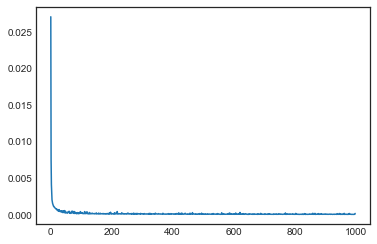

In [78]:
# Training the model
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mean_squared_error'])), axis = 0)
    
# plot metrics
plt.plot(hist)
plt.show()

In [79]:
y_pred = model.predict(features_validation, verbose=0)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.828782939913 / 1.0
MSE score =  0.000170684712687 / 0.0


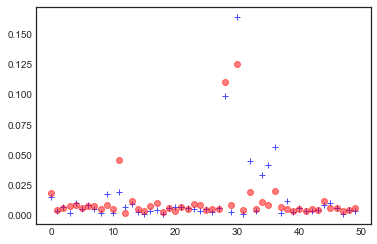

In [80]:
#Lets plot the  first 50 predictions
plt.plot(y_test.as_matrix()[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.show()

## Light GBM

Light GBM is a gradient boosting framework that uses tree based learning algorithm.

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

In [81]:
df_train = pd.read_csv(
    'train.csv', usecols=[1, 2, 3, 4, 5],
    dtype={'onpromotion': bool},
    converters={'unit_sales': lambda u: np.log1p(
        float(u)) if float(u) > 0 else 0},
    parse_dates=["date"],
    skiprows=range(1, 66458909)  # 2016-01-01
)

In [82]:
df_train.head()

date  store_nbr  item_nbr  unit_sales  onpromotion
0 2016-01-01         25    105574    2.564949        False
1 2016-01-01         25    105575    2.302585        False
2 2016-01-01         25    105857    1.386294        False
3 2016-01-01         25    108634    1.386294        False
4 2016-01-01         25    108701    1.098612         True

In [83]:
df_train.shape

(59038132, 5)

In [84]:
df_train.tail()

date  store_nbr  item_nbr  unit_sales  onpromotion
59038127 2017-08-15         54   2089339    1.609438        False
59038128 2017-08-15         54   2106464    0.693147         True
59038129 2017-08-15         54   2110456    5.262690        False
59038130 2017-08-15         54   2113914    5.293305         True
59038131 2017-08-15         54   2116416    1.098612        False

In [85]:
df_test = pd.read_csv(
    "test.csv", usecols=[0, 1, 2, 3, 4],
    dtype={'onpromotion': bool},
    parse_dates=["date"]  # , date_parser=parser
).set_index(
    ['store_nbr', 'item_nbr', 'date']
)

In [86]:
#we want to predict unit sales for last 15 days of Aug 2017
df_test.head()

id  onpromotion
store_nbr item_nbr date                              
1         96995    2017-08-16  125497040        False
          99197    2017-08-16  125497041        False
          103501   2017-08-16  125497042        False
          103520   2017-08-16  125497043        False
          103665   2017-08-16  125497044        False

In [87]:
items = pd.read_csv(
    "items.csv",
).set_index("item_nbr")

In [88]:
items.shape

(4100, 3)

In [89]:
df_2017 = df_train[df_train.date.isin(
    pd.date_range("2017-05-31", periods=7 * 11))].copy()
del df_train
#dates range from May 31st to 15th Aug~ 77 days

In [90]:
df_2017.shape

(8125670, 5)

In [91]:
df_2017.head()

date  store_nbr  item_nbr  unit_sales  onpromotion
50912462 2017-05-31          1     96995    0.693147        False
50912463 2017-05-31          1     99197    0.693147        False
50912464 2017-05-31          1    103520    1.386294        False
50912465 2017-05-31          1    103665    2.197225        False
50912466 2017-05-31          1    105574    1.386294        False

In [92]:
df_2017.isnull().sum()

date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64

In [93]:
promo_2017_train = df_2017.set_index(
    ["store_nbr", "item_nbr", "date"])[["onpromotion"]].unstack(
        level=-1).fillna(False)
#pivots the table and we want last level of index which is date in our case

In [94]:
promo_2017_train.head()

onpromotion                                              \
date                2017-05-31 2017-06-01 2017-06-02 2017-06-03 2017-06-04   
store_nbr item_nbr                                                           
1         96995          False      False      False      False      False   
          99197          False      False      False      False      False   
          103520         False      False      False      False      False   
          103665         False      False      False      False      False   
          105574         False      False      False      False      False   

                                                                           \
date               2017-06-05 2017-06-06 2017-06-07 2017-06-08 2017-06-09   
store_nbr item_nbr                                                          
1         96995         False      False      False      False      False   
          99197         False      False      False      False      False   
          103520        False      False      False      False      False   
          103665        False      False      False      False      False   
          105574        False      False      False      False      False   

                      ...                                                  \
date                  ...     2017-08-06 2017-08-07 2017-08-08 2017-08-09   
store_nbr item_nbr    ...                                                   
1         96995       ...          False      False      False      False   
          99197       ...          False      False      False      False   
          103520      ...          False      False      False      False   
          103665      ...          False      False      False      False   
          105574      ...          False      False      False      False   

                                                                           \
date               2017-08-10 2017-08-11 2017-08-12 2017-08-13 2017-08-14   
store_nbr item_nbr                                                          
1         96995         False      False      False      False      False   
          99197         False      False      False      False      False   
          103520        False      False      False      False      False   
          103665        False      False      False      False      False   
          105574        False      False      False      False      False   

                               
date               2017-08-15  
store_nbr item_nbr             
1         96995         False  
          99197         False  
          103520        False  
          103665        False  
          105574        False  

[5 rows x 77 columns]

In [95]:
promo_2017_train.columns = promo_2017_train.columns.get_level_values(1)

In [96]:
promo_2017_train.columns

DatetimeIndex(['2017-05-31', '2017-06-01', '2017-06-02', '2017-06-03',
               '2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07',
               '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11',
               '2017-06-12', '2017-06-13', '2017-06-14', '2017-06-15',
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27',
               '2017-06-28', '2017-06-29', '2017-06-30', '2017-07-01',
               '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-07', '2017-07-08', '2017-07-09',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-15', '2017-07-16', '2017-07-17',
               '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-21',
               '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
      

In [97]:
#Repeat same steps for test dataset
promo_2017_test = df_test[["onpromotion"]].unstack(level=-1).fillna(False)
promo_2017_test.columns = promo_2017_test.columns.get_level_values(1)

In [98]:
promo_2017_test.head()
promo_2017_test.shape

(210654, 16)

In [99]:
promo_2017_test = promo_2017_test.reindex(promo_2017_train.index).fillna(False)
#Reseting the index same as promo_2017_train
promo_2017 = pd.concat([promo_2017_train, promo_2017_test], axis=1)

In [100]:
del promo_2017_test,promo_2017_train

In [101]:
df_2017 = df_2017.set_index(
    ["store_nbr", "item_nbr", "date"])[["unit_sales"]].unstack(
        level=-1).fillna(0)
df_2017.columns = df_2017.columns.get_level_values(1)

In [102]:
promo_2017.head()

date                2017-05-31  2017-06-01  2017-06-02  2017-06-03  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-06-04  2017-06-05  2017-06-06  2017-06-07  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-06-08  2017-06-09     ...      2017-08-22  \
store_nbr item_nbr                             ...                   
1         96995          False       False     ...           False   
          99197          False       False     ...           False   
          103520         False       False     ...           False   
          103665         False       False     ...           False   
          105574         False       False     ...           False   

date                2017-08-23  2017-08-24  2017-08-25  2017-08-26  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-08-27  2017-08-28  2017-08-29  2017-08-30  2017-08-31  
store_nbr item_nbr                                                              
1         96995          False       False       False       False       False  
          99197          False       False       False       False       False  
          103520         False       False       False       False       False  
          103665         False       False       False       False       False  
          105574         False       False       False       False       False  

[5 rows x 93 columns]

In [103]:
items = items.reindex(df_2017.index.get_level_values(1))

In [104]:
items.head()

family  class  perishable
item_nbr                                 
96995        GROCERY I   1093           0
99197        GROCERY I   1067           0
103520       GROCERY I   1028           0
103665    BREAD/BAKERY   2712           1
105574       GROCERY I   1045           0

In [105]:
def get_timespan(df, dt, minus, periods):
    return df[
        pd.date_range(dt - timedelta(days=minus), periods=periods)
    ]

In [106]:
def prepare_dataset(t2017, is_train=True):
    X = pd.DataFrame({
        "mean_3_2017": get_timespan(df_2017, t2017, 3, 3).mean(axis=1).values,
        "mean_7_2017": get_timespan(df_2017, t2017, 7, 7).mean(axis=1).values,
        "mean_14_2017": get_timespan(df_2017, t2017, 14, 14).mean(axis=1).values,
        "promo_14_2017": get_timespan(promo_2017, t2017, 14, 14).sum(axis=1).values
    })
    for i in range(16):
        X["promo_{}".format(i)] = promo_2017[
            t2017 + timedelta(days=i)].values.astype(np.uint8)
    if is_train:
        y = df_2017[
            pd.date_range(t2017, periods=16)
        ].values
        return X, y
    return X

In [107]:
print("Preparing dataset...")
t2017 = date(2017, 6, 21)
X_l, y_l = [], []
for i in range(4):
    delta = timedelta(days=7 * i)
    X_tmp, y_tmp = prepare_dataset(
        t2017 + delta
    )
    X_l.append(X_tmp)
    y_l.append(y_tmp)
X_train = pd.concat(X_l, axis=0)
y_train = np.concatenate(y_l, axis=0)
del X_l, y_l
X_val, y_val = prepare_dataset(date(2017, 7, 26))
X_test = prepare_dataset(date(2017, 8, 16), is_train=False)

Preparing dataset...


In [108]:
print("Training and predicting models...")
params = {
    'num_leaves': 2**5 - 1,
    'objective': 'regression_l2',
    'max_depth': 8,
    'min_data_in_leaf': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.75,
    'bagging_freq': 1,
    'metric': 'l2',
    'num_threads': 4
}


Training and predicting models...


In [109]:
MAX_ROUNDS = 1000
val_pred = []
test_pred = []
cate_vars = []

In [110]:
for i in range(16):
    print("=" * 50)
    print("Step %d" % (i+1))
    print("=" * 50)
    dtrain = lgb.Dataset(
        X_train, label=y_train[:, i],
        categorical_feature=cate_vars,
        weight=pd.concat([items["perishable"]] * 4) * 0.25 + 1
    )
    dval = lgb.Dataset(
        X_val, label=y_val[:, i], reference=dtrain,
        weight=items["perishable"] * 0.25 + 1,
        categorical_feature=cate_vars)
    bst = lgb.train(
        params, dtrain, num_boost_round=MAX_ROUNDS,
        valid_sets=[dtrain, dval], early_stopping_rounds=50, verbose_eval=50
    )
    print("\n".join(("%s: %.2f" % x) for x in sorted(
        zip(X_train.columns, bst.feature_importance("gain")),
        key=lambda x: x[1], reverse=True
    )))
    val_pred.append(bst.predict(
        X_val, num_iteration=bst.best_iteration or MAX_ROUNDS))
    test_pred.append(bst.predict(
        X_test, num_iteration=bst.best_iteration or MAX_ROUNDS))

Step 1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.345097	valid_1's l2: 0.341325
[100]	training's l2: 0.333329	valid_1's l2: 0.330014
[150]	training's l2: 0.331387	valid_1's l2: 0.328774
[200]	training's l2: 0.330338	valid_1's l2: 0.328296
[250]	training's l2: 0.329482	valid_1's l2: 0.327889
[300]	training's l2: 0.328796	valid_1's l2: 0.327648
[350]	training's l2: 0.328179	valid_1's l2: 0.327391
[400]	training's l2: 0.32762	valid_1's l2: 0.32721
[450]	training's l2: 0.327135	valid_1's l2: 0.327108
[500]	training's l2: 0.326678	valid_1's l2: 0.327039
[550]	training's l2: 0.326257	valid_1's l2: 0.326976
[600]	training's l2: 0.325865	valid_1's l2: 0.32694
[650]	training's l2: 0.325471	valid_1's l2: 0.32692
[700]	training's l2: 0.325077	valid_1's l2: 0.326862
[750]	training's l2: 0.32472	valid_1's l2: 0.326886
Early stopping, best iteration is:
[700]	training's l2: 0.325077	valid_1's l2: 0.326862
mean_14_2017: 1986449.84
mean_7_2017: 1457763.98
mean_3_2017:

[100]	training's l2: 0.387503	valid_1's l2: 0.484477
[150]	training's l2: 0.38451	valid_1's l2: 0.483293
Early stopping, best iteration is:
[133]	training's l2: 0.385266	valid_1's l2: 0.483197
mean_14_2017: 2173915.37
mean_7_2017: 779085.54
mean_3_2017: 309418.75
promo_6: 153438.12
promo_14_2017: 48445.64
promo_3: 14017.86
promo_7: 9137.57
promo_13: 8640.51
promo_5: 7108.16
promo_0: 4701.30
promo_1: 3898.41
promo_4: 3646.02
promo_9: 3257.32
promo_2: 2908.48
promo_14: 2786.73
promo_8: 1924.80
promo_15: 943.23
promo_12: 873.16
promo_11: 850.42
promo_10: 779.03
Step 8
Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.38804	valid_1's l2: 0.460395
[100]	training's l2: 0.375671	valid_1's l2: 0.44255
[150]	training's l2: 0.372894	valid_1's l2: 0.439745
[200]	training's l2: 0.371495	valid_1's l2: 0.438764
[250]	training's l2: 0.370359	valid_1's l2: 0.438271
[300]	training's l2: 0.369416	valid_1's l2: 0.437744
[350]	training's l2: 0.368715	valid_1's l2: 0.43761

Step 15
Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.410919	valid_1's l2: 0.410371
[100]	training's l2: 0.397115	valid_1's l2: 0.398748
[150]	training's l2: 0.394313	valid_1's l2: 0.397684
[200]	training's l2: 0.392711	valid_1's l2: 0.397309
[250]	training's l2: 0.391556	valid_1's l2: 0.397216
[300]	training's l2: 0.390632	valid_1's l2: 0.397001
[350]	training's l2: 0.389878	valid_1's l2: 0.396751
[400]	training's l2: 0.389201	valid_1's l2: 0.396668
[450]	training's l2: 0.388549	valid_1's l2: 0.396577
Early stopping, best iteration is:
[443]	training's l2: 0.388637	valid_1's l2: 0.396544
mean_14_2017: 2325703.66
mean_7_2017: 697625.27
mean_3_2017: 244009.25
promo_14: 232375.05
promo_14_2017: 50039.63
promo_7: 32257.52
promo_0: 29105.04
promo_15: 20072.46
promo_13: 11033.72
promo_9: 9036.77
promo_12: 8426.44
promo_10: 6103.29
promo_2: 4641.07
promo_6: 4357.55
promo_11: 3179.79
promo_8: 2955.70
promo_4: 2468.38
promo_1: 1808.81
promo_5: 1281.50
prom

In [111]:
print("Validation mse:", mean_squared_error(
    y_val, np.array(val_pred).transpose()))

Validation mse: 0.413994342653


In [112]:
print("Making submission...")
y_test = np.array(test_pred).transpose()
df_preds = pd.DataFrame(
    y_test, index=df_2017.index,
    columns=pd.date_range("2017-08-16", periods=16)
).stack().to_frame("unit_sales")
df_preds.index.set_names(["store_nbr", "item_nbr", "date"], inplace=True)


Making submission...


In [113]:
submission = df_test[["id"]].join(df_preds, how="left").fillna(0)

# 13. Conclusion
We are getting following results on applying data set on different models:

| Model | R2 Score |
| --- | --- |
| Linear Regression | 0.354 |
| Decision Tree Regression | 0.825 |
| Extra Tree Regression   | 0.825 |
| Random Forest Regression  | 0.836 |
| Gradient Boosting Regression | 0.836 |
| XG Boost | 0.797 |
| LGBM | 0.759 |


# 14. References and Attributions

[1] Cui, G., Wong, M. L., & Lui, H. K. (2006). Machine learning for direct marketing response models:
Bayesian networks with evolutionary programming.Management Science, 52(4), 597-612

[2] Taylor, E. L. (2014). Predicting Consumer Behavior. Research World, 2014(46), 67-68

[3] Morwitz, V. G., Steckel, J. H., & Gupta, A. (2007). When do purchase intentions predict sales?.
International Journal of Forecasting, 23(3), 347-364

[4] https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data

[5] https://en.wikipedia.org/wiki/Xgboost

[6] https://en.wikipedia.org/wiki/Random_forest

[7] https://en.wikipedia.org/wiki/Decision_tree

[8]https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vsxgboost/

[9] https://www.tutorialspoint.com/sales_forecasting/sales_forecasting_discussion.html

[10] https://www.datawatch.com/what-is-data-blending/

The text in the document by Source Wikipedia is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The text in the document by Analytics Vidhya is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The text in the document by towards data science is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document by Source Kaggle is licensed under the MIT License https://opensource.org/licenses/MIT